# 【论文复现】多人姿态关键点检测：OpenPose的飞桨复现

## 0. 导入

跳舞的火柴人

![](https://ai-studio-static-online.cdn.bcebos.com/cbe07425410a449d89982cca36c4b9c21e1b99b57a7147a2b60cb70ea8527ad0)
![](https://ai-studio-static-online.cdn.bcebos.com/871fba42d6d94145b0adf1fbd71532a18baecbba86404863a2b70b655836c74f)
![](https://ai-studio-static-online.cdn.bcebos.com/ed691d5e60014a1cbcb49bb1e9e0191e5beffeba8e9f4767a28d6a795592c63c)
![](https://ai-studio-static-online.cdn.bcebos.com/7656a21ed8464a928ac56cb17c64ae88f62fd61ee46a40c3a4b0826a8b82705a)


## 1. 项目简介

该项目给出了Paddle版本的OpenPose实现及其简单应用，该项目主要参照[pytorch-openpose](https://github.com/Hzzone/pytorch-openpose)，在AI Studio平台上利用Paddle修改并重写了代码，并且完成了模型参数的转化工作。
该项目的内容总结如下：
* 给出了Paddle框架实现的多人姿态关键点提取的网络代码实现，
* 给出了针对15、18、25人体姿态关键点提取模型参数以及人脸部70个关键节点和手部21个关键节点的模型及其参数，
* 给出了使用改代码的实例并对结果做出了可视化展示。

## 2. OpenPose概述

OpenPose是第一个实时从单张RGB图片提取多人体骨骼框架的系统，该代码库的作者是[**Ginés Hidalgo**](https://www.gineshidalgo.com), [**Zhe Cao**](https://people.eecs.berkeley.edu/~zhecao), [**Tomas Simon**](http://www.cs.cmu.edu/~tsimon), [**Shih-En Wei**](https://scholar.google.com/citations?user=sFQD3k4AAAAJ&hl=en), [**Yaadhav Raaj**](https://www.raaj.tech), [**Hanbyul Joo**](https://jhugestar.github.io), **and** [**Yaser Sheikh**](http://www.cs.cmu.edu/~yaser)。官方代码地址[Openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose)。Openpose内置了提取人体姿态15、18、25个关键点和人脸部70个关键点、手部21个关键节点的解决方案。下面将以人的姿态关键点为例展开介绍，脸部和手部的关键点类似。


网络结构是一个全卷积的结构，该网络的设计思路在于使用步长大于1的卷积层扩大感受野，使网络能够对人体其他部位有整体的认知，最后的网络输出是包含人体关键节点的热力图，每张热力图表示人的单个节点的位置，网络结构图如下所示。（图片来源：[Convolutional Pose Machines](https://arxiv.org/pdf/1602.00134.pdf)）
![](https://ai-studio-static-online.cdn.bcebos.com/b4cb1dc8c56b484ba01826ad3ffc4a6af549abdd1d2f44209445f27097187e9a)

在文章[Convolutional Pose Machines](https://arxiv.org/pdf/1602.00134.pdf)中，网络只能提取单人的pose，为了使它能够泛化到多人姿态的估计，后续的文章[Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields](https://arxiv.org/pdf/1611.08050.pdf)提出了人体关键节点关联场（PAF：Part Affinity Fields）的概念，使用PAF关联同一个人的节点，该文章也给出了关联节点后处理步骤的算法。下图给出了PAF的示意图。（图片来源：[Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields](https://arxiv.org/pdf/1611.08050.pdf)）
![](https://ai-studio-static-online.cdn.bcebos.com/0124495b584340b484a01a02a51ff43c37380b599dab482cb692032eea1ecfca)

这里只给出了十分简洁的介绍，有兴趣的读者可以到原文中查看细节。推荐阅读顺序
* [Convolutional Pose Machines](https://arxiv.org/pdf/1602.00134.pdf)
* [Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields](https://arxiv.org/pdf/1611.08050.pdf)
* [OpenPose: Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields](https://arxiv.org/pdf/1812.08008.pdf)

## 3. 代码结构

* /home/aistudio/openpose: 主要代码目录
* /home/aistudio/openpose/models: 模型代码
* /home/aistudio/openpose/postprocess: 后处理代码
* /home/aistudio/openpose/detectors: 主提取关键点类及其方法
* /home/aistudio/openpose/images: 演示实例图片
* /home/aistudio/data/data66164: 内置的模型参数文件

# 4. 如何使用

### 4.1 下载依赖包

In [1]:
pip install -r ./openpose/requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simpleNote: you may need to restart the kernel to use updated packages.



### 4.2 创建网络，加载参数，读入数据

In [2]:
import sys
sys.path.append('E:/Coding_Python/openpose-paddle/openpose')
# 取出需要的检测单元
import cv2
from openpose.detectors.detector import PoseDetector

detector = PoseDetector( pose_points=25, detect_face=False, detect_hand=False)
oriImg = cv2.imread('E:/Coding_Python/openpose-paddle/openpose/images/COCO_val2014_000000000241.jpg')

output = detector(oriImg)

E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  'box': Image.BOX,
E:\Anaconda\envs\paddle_202\l

In [3]:
import paddle
from PIL import Image
from paddle.vision.transforms import transforms as t
img = Image.open('E:/Coding_Python/openpose-paddle/openpose/images/1.jpg')
tf = t.Compose([
    t.ToTensor()
])
print(tf(img).shape)

[3, 1024, 1024]


### 4.3 可视化展示结果

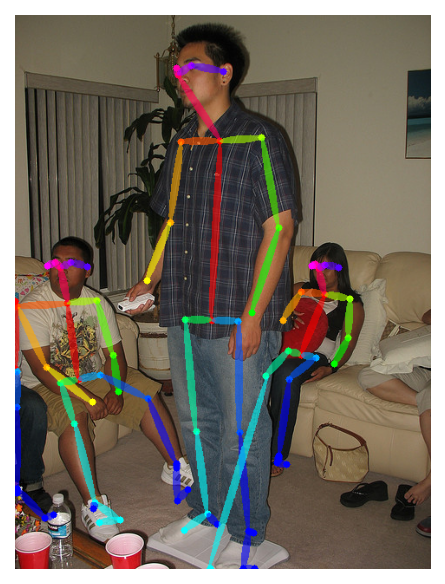

In [4]:
from openpose.util import draw_pose
import matplotlib.pyplot as plt

canvas = draw_pose(oriImg, output, pose_points=25)

plt.rcParams['figure.dpi'] = 150
plt.axis('off')
plt.imshow(canvas[:, :, [2, 1, 0]])

### 4.4 其他模型

* 检测人体25个关键节点

In [1]:
import sys
sys.path.append('E:/Coding_Python/openpose-paddle/openpose')
import cv2
from openpose.detectors.body import Body

body_estimation = Body(25)
oriImg = cv2.imread('E:/Coding_Python/openpose-paddle/openpose/images/COCO_val2014_000000000328.jpg')
candidate, subset = body_estimation(oriImg)

E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  'box': Image.BOX,
E:\Anaconda\envs\paddle_202\l

NameError: name 'cv2' is not defined

In [6]:

print(type(oriImg))

<class 'numpy.ndarray'>


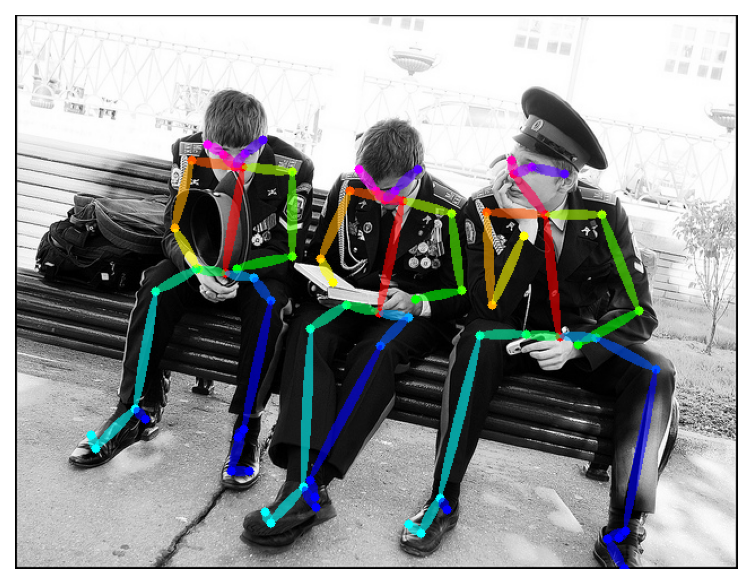

In [7]:
import cv2
import matplotlib.pyplot as plt
from openpose.util import draw_bodypose

canvas = draw_bodypose(oriImg, candidate, subset, 25)
plt.rcParams['figure.dpi'] = 150
plt.axis('off')
plt.imshow(canvas[:, :, [2, 1, 0]])

* 检测手部关键节点

In [2]:
import sys
sys.path.append('E:/Coding_Python/openpose-paddle/openpose')
import cv2
from openpose.detectors.hand import Hand

hand_estimation = Hand()
oriImg = cv2.imread('E:/Coding_Python/openpose-paddle/openpose/images/hand.jpg')
output = hand_estimation(oriImg)

AttributeError: 'numpy.ndarray' object has no attribute 'type'

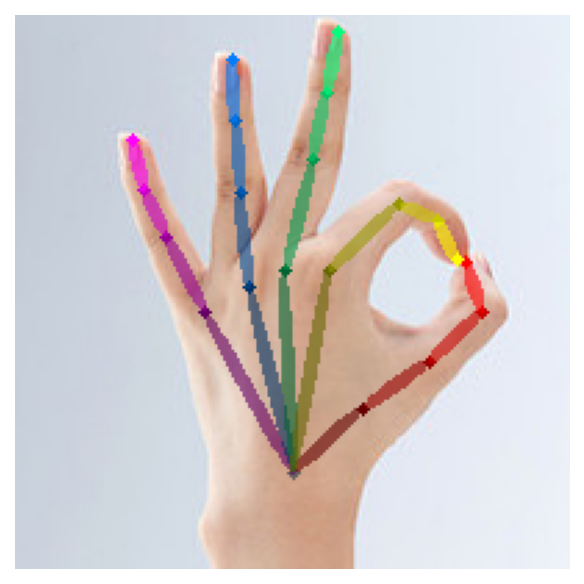

In [3]:
import cv2
import matplotlib.pyplot as plt
from openpose.util import draw_handpose

canvas = draw_handpose(oriImg, [output])
plt.rcParams['figure.dpi'] = 150
plt.axis('off')
plt.imshow(canvas[:, :, [2, 1, 0]])
img  = canvas[:, :, [2, 1, 0]]
print(img.type, img.shape)

* 检测脸部关键节点

In [1]:
import sys
sys.path.append('E:/Coding_Python/openpose-paddle/openpose')
import cv2

from openpose.detectors.face import Face

face_estimation = Face()
oriImg = cv2.imread('E:/Coding_Python/openpose-paddle/openpose/images/demo.jpg')
output = face_estimation(oriImg)
cv2.imshow(output)

E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  'box': Image.BOX,
E:\Anaconda\envs\paddle_202\l

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


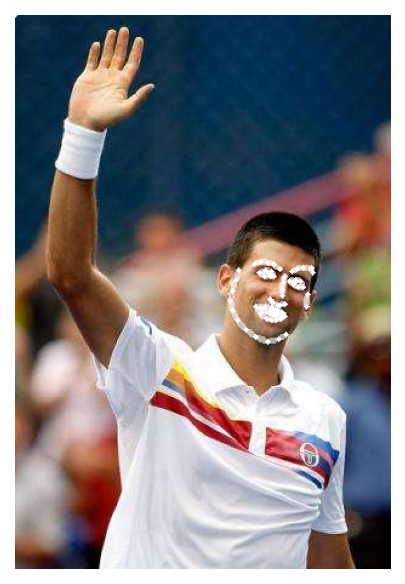

In [11]:
from util import draw_facepose
import cv2
import matplotlib.pyplot as plt

canvas = draw_facepose(oriImg, [output])
plt.rcParams['figure.dpi'] = 150
plt.axis('off')
plt.imshow(canvas[:, :, [2, 1, 0]])

### 4.5 可视化展示PAF 

In [1]:
import sys
sys.path.append('E:/Coding_Python/openpose-paddle/openpose')
import cv2
import numpy as np

import paddle.fluid as F
import paddle.fluid.dygraph as dg

from openpose.models import build_body_model

body_model = build_body_model(18)
body_model.eval()

oriImg = cv2.imread('E:/Coding_Python/openpose-paddle/openpose/images/COCO_val2014_000000000241.jpg')
oriImg = np.float32(oriImg[:, :, :, np.newaxis]).transpose((3, 2, 0, 1)) / 255. - 0.5
oriImg = dg.to_variable(oriImg)

output = body_model(oriImg)

E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
E:\Anaconda\envs\paddle_202\lib\site-packages\paddle\vision\transforms\functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  'box': Image.BOX,
E:\Anaconda\envs\paddle_202\l

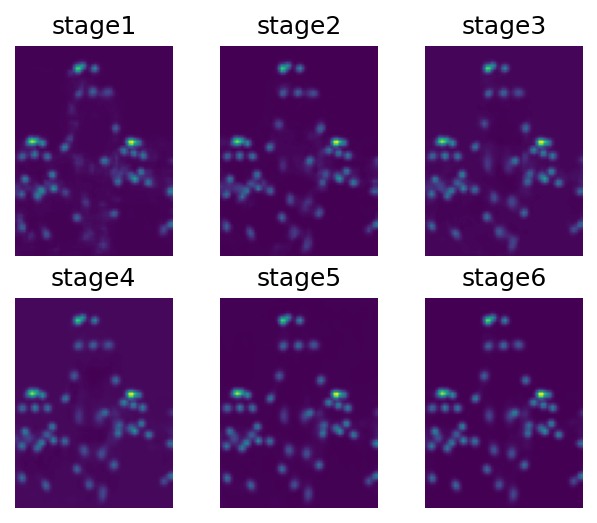

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (5, 4)
for stage in range(6):
    plt.subplot(2, 3, stage + 1)
    plt.axis('off')
    plt.title("stage%d" % (stage + 1))
    plt.imshow(output[stage].numpy()[0][:18].sum(axis=0))

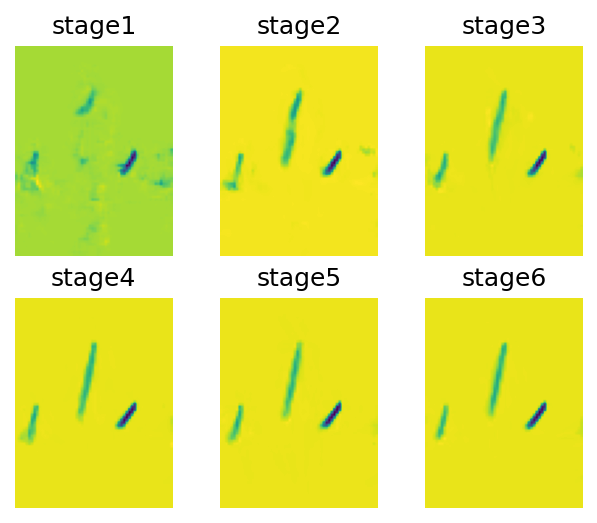

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (5, 4)
for stage in range(6):
    plt.subplot(2, 3, stage + 1)
    plt.axis('off')
    plt.title("stage%d" % (stage + 1))
    plt.imshow(output[stage].numpy()[0][19])

### About this code

Several pose estimation model written in Paddle (No code for training). This code is heavily copied from [pytorch-openpose](https://github.com/Hzzone/pytorch-openpose).

Original project: [Openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose)

Paper: [OpenPose: Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields](https://arxiv.org/pdf/1812.08008.pdf)

If this work is useful for you, please cite

@article{8765346,\
  author = {Z. {Cao} and G. {Hidalgo Martinez} and T. {Simon} and S. {Wei} and Y. A. {Sheikh}},\
  journal = {IEEE Transactions on Pattern Analysis and Machine Intelligence},\
  title = {OpenPose: Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields},\
  year = {2019}\
}

@inproceedings{simon2017hand,\
  author = {Tomas Simon and Hanbyul Joo and Iain Matthews and Yaser Sheikh},\
  booktitle = {CVPR},\
  title = {Hand Keypoint Detection in Single Images using Multiview Bootstrapping},\
  year = {2017}\
}

@inproceedings{cao2017realtime,\
  author = {Zhe Cao and Tomas Simon and Shih-En Wei and Yaser Sheikh},\
  booktitle = {CVPR},\
  title = {Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields},\
  year = {2017}\
}

@inproceedings{wei2016cpm,\
  author = {Shih-En Wei and Varun Ramakrishna and Takeo Kanade and Yaser Sheikh},\
  booktitle = {CVPR},\
  title = {Convolutional pose machines},\
  year = {2016}\
}